In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary_methods import *
from zbias_data_generation import MonteCarloSimulation


    Data generation - Monte Carlo simulation Simulations
        - Additive model
        - Multiplicative model


    Assumed Causal diagram:
        U       -       An unmeasured confounder
        Z       -       Instrumental variable
        (X,Y)   -       The exposure-outcome pair

    Graph structure:
        U -> X (alpha1)
        U -> Y (beta1)
        X -> Y (beta2)
        Z -> U (gamma1)
        Z -> X (alpha2)

    The true "exposure effect" and target of estimation is beta2.

    For simplicity and to reflect a common study framework, all variables are binary.

    The measured covariate Z may act as a confounder or as an instrumental variable for the exposure-outcome pair (X, Y).
    Note that Z is not a perfect instrument because it is associated with the unmeasured confounder U through gamma1
    However, by varying the value of gamma1, we can explore the impacts of conditioning on Z when it is a perfect instrument and when it is a near-instrument or confounder.
    

In [2]:
max_k = 30

In [3]:
M = MonteCarloSimulation(n_simulations=1, dataset_size=10000, random_seed=1976)

Start Monte Carlo Simulation .. 2019-03-13 21:00:22.531270
Start Additive Simulation .. 2019-03-13 21:00:22.531670
Finish Additive Simulation .. 2019-03-13 21:00:22.536568
Start Multiplicative Simulation .. 2019-03-13 21:00:22.536651
Finish Multiplicative Simulation .. 2019-03-13 21:00:22.539612
Finish Monte Carlo Simulation .. 2019-03-13 21:00:22.539724


In [4]:
M.additive_data.shape

(10000, 3)

In [5]:
df = M.additive_data
df.head()

,Z,T,Y
0,1,0,0
1,0,0,0
2,1,0,0
3,1,1,0
4,0,1,0


# Baseline evaluations

In [6]:
IPW = calc_inv_propensity_score_weighting(df)
IPW

0.26797987721792454

In [7]:
baseline_euclidean = calc_matching(df, dist_func='euclidean', k=range(1, max_k+1))
baseline_euclidean[0]

0.5585036972596781

In [8]:
baseline_mahalanobis = calc_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
baseline_mahalanobis[0]

0.5585036972596781

# Evaluations from treatment predictions

In [9]:
model_t_euclidean = calc_model_t_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_t_euclidean[0]

0.5585036972596781

In [10]:
model_t_mahalanobis = calc_model_t_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_t_mahalanobis[0]

0.5585036972596781

# Evaluation from outcome predictions

In [11]:
model_y_euclidean = calc_model_y_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_y_euclidean[0]

0.5585036972596781

In [12]:
model_y_mahalanobis = calc_model_y_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_y_mahalanobis[0]

0.5585036972596781

# Evaluation from outcome and treatment predictions

In [13]:
model_y_model_t_euclidean = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='euclidean', k=range(1,max_k+1))
model_y_model_t_euclidean[0]

0.5585036972596781

In [14]:
model_y_model_t_mahalanobis = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='mahalanobis', k=range(1,max_k+1))
model_y_model_t_mahalanobis[0]

0.5585036972596781

# Save all joint values

In [35]:
joint_values = pd.DataFrame({'k':range(1, max_k+1), 
                            'baseline_euclidean':baseline_euclidean, 
                            'baseline_mahalanobis':baseline_mahalanobis, 
                            'model_t_euclidean':model_t_euclidean, 
                            'model_t_mahalanobis':model_t_mahalanobis, 
                            'model_y_euclidean':model_y_euclidean, 
                            'model_y_mahalanobis':model_y_mahalanobis, 
                            'model_y_model_t_euclidean':model_y_model_t_euclidean, 
                            'model_y_model_t_mahalanobis':model_y_model_t_mahalanobis
                           })
joint_values.head(30)

,k,baseline_euclidean,baseline_mahalanobis,model_t_euclidean,model_t_mahalanobis,model_y_euclidean,model_y_mahalanobis,model_y_model_t_euclidean,model_y_model_t_mahalanobis
0,1,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504
1,2,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504
2,3,0.355082,0.355082,0.355082,0.355082,0.355082,0.355082,0.558504,0.558504
3,4,0.253371,0.253371,0.253371,0.253371,0.253371,0.253371,0.558504,0.558504
4,5,0.236451,0.236451,0.236451,0.236451,0.236451,0.236451,0.358504,0.358504
5,6,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170
6,7,0.272789,0.272789,0.272789,0.272789,0.272789,0.272789,0.272789,0.272789
7,8,0.183504,0.183504,0.183504,0.183504,0.183504,0.183504,0.183504,0.183504
8,9,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170,0.225170
9,10,0.219530,0.219530,0.219530,0.219530,0.219530,0.219530,0.158504,0.158504


In [36]:
joint_values.to_csv('../Data/zbias_additive_outputs.csv')

In [37]:
joint_values = pd.read_csv('../Data/zbias_additive_outputs.csv', index_col=0)
joint_values.head()

,k,baseline_euclidean,baseline_mahalanobis,model_t_euclidean,model_t_mahalanobis,model_y_euclidean,model_y_mahalanobis,model_y_model_t_euclidean,model_y_model_t_mahalanobis
0,1,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504
1,2,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504,0.558504
2,3,0.355082,0.355082,0.355082,0.355082,0.355082,0.355082,0.558504,0.558504
3,4,0.253371,0.253371,0.253371,0.253371,0.253371,0.253371,0.558504,0.558504
4,5,0.236451,0.236451,0.236451,0.236451,0.236451,0.236451,0.358504,0.358504


# Plot the joint values

In [38]:
joint_values.columns[1:]

Index(['baseline_euclidean', 'baseline_mahalanobis', 'model_t_euclidean',
       'model_t_mahalanobis', 'model_y_euclidean', 'model_y_mahalanobis',
       'model_y_model_t_euclidean', 'model_y_model_t_mahalanobis'],
      dtype='object')

In [39]:
long_values = pd.DataFrame(columns=['num_neighbors', 'model_type', 'distance', 'ATT value'])
for model_type in ['baseline', 'model_t', 'model_y', 'model_y_model_t']:
    for distance in ['euclidean', 'mahalanobis']:
        long_values = pd.concat([long_values, 
                                 pd.DataFrame({'num_neighbors':joint_values.k, 
                                               'model_type':model_type, 
                                               'distance':distance, 
                                               'ATT value':joint_values['_'.join([model_type, distance])]})])
long_values.shape

(240, 4)

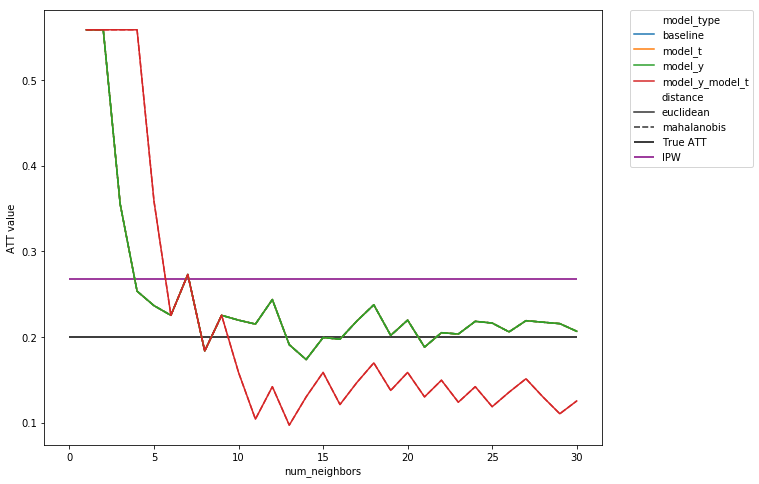

In [40]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=long_values, x='num_neighbors', y='ATT value', hue='model_type', style='distance')
plt.hlines(0.2, 0, joint_values.k.max(), label="True ATT")
plt.hlines(IPW, 0, joint_values.k.max(), colors=['purple'], label="IPW")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../Paper/images/z_bias_additive_ATT_estimations_by_k_neighbors.jpg')
plt.show()